# Predicting Traffic Accident Severity



## Contents
1. [Introduction](#intro)
2. [Data](#data)
3. [Data Cleaning](#clean)
4. [EDA](#eda)
5. [Data Preparation](#prep)
6. [Model Development](#modeling)
5. [Results](#results)
    
    
# 1. Introduction <a id='intro'>
Road traffic injuries are currently estimated to be the eighth leading cause of death across all age groups globally, and are predicted to become the seventh leading cause of death by 2030.
    
Analysing a significant range of factors, including weather conditions, special events, roadworks, traffic jams among others, an accurate prediction of the severity of the accidents can be performed.

These insights, could allow law enforcement bodies to allocate their resources more effectively in advance of potential accidents, preventing when and where a severe accidents can occur as well as saving both, time and money. In addition, this knowledge of a severe accident situation can be warned to drivers so that they would drive more carefully or even change their route if it is possible or to hospital which could have set everything ready for a severe intervention in advance.

Governments should be highly interested in accurate predictions of the severity of an accident, in order to reduce the time of arrival and thus save a significant amount of people each year. Others interested could be private companies investing in technologies aiming to improve road safeness.

# 2. Data <a id='data'>
    
The original data for this project comes from the following [Kaggle data set](https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016). In a previous notebook, I performed a selection of the most relevant features for the prediction of traffic accident severity. 

The features of the dataset resulting are the following:

In the *characteristics* dataset, I will keep the features: "lighting", "localisation"(agg), "type of intersection", "atmospheric conditions", "type of collisions", "department", "adress", "time" and the coordinates. I added two new features from this original dataset: "date" and "weekend" indicating if the accident occurred during the weekend or not.

In the *places* dataset, I will keep only the features: "road categorie", "traffic regime", "number of traffic lanes", "road profile", "road shape", "surface condition", "situation", "school nearby" and "infrastructure".

From the *users* dataset, I have created the following features: 
+ num_us: total number of users involved in the accident.
+ ped: Wether there are pedestrians involved or not.
+ critic_age: If there is any user in between 17 and 31 y.o.
+ sev : maximum gravity suffered by any user involved in the accident:
    + 0 = Unscathered or Light injury
    + 1 = Hospitalized wonded or Death

I used the *holiday* dataset to craft a new feature indicating the accident accurred during a holiday.

# 3. Data Cleaning <a id='clean'>
    
Before starting to run any ML algorithm on the data, the data have to go through the preprocessing part. In this part, data will be cleaned so there is no missing or unusual value. The goal is that the data is the best possible before applying the algorithms.

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('finaldata.csv')


In [3]:
df.head(10)

,Unnamed: 0,ID,time,lum,agg,int,atm,col,lat,long,...,situation,school,crit_age,ped,dead_age,num_us,sev,date,weekend,holiday
0,0,201600000001,14.0,1,2,1,8.0,3.0,0.0,0,...,1.0,0.0,0,0,0,2,1,2016-02-01,0,0.0
1,1,201600000002,18.0,1,2,6,1.0,6.0,0.0,0,...,1.0,0.0,0,0,0,3,1,2016-03-16,0,0.0
2,2,201600000003,19.0,1,1,1,1.0,6.0,0.0,0,...,3.0,99.0,1,1,0,2,1,2016-07-13,0,0.0
3,3,201600000004,19.0,2,2,1,7.0,3.0,0.0,0,...,1.0,99.0,1,0,0,3,1,2016-08-15,0,1.0
4,4,201600000005,11.0,1,2,3,1.0,3.0,0.0,0,...,1.0,3.0,0,0,0,3,1,2016-12-23,0,0.0
5,5,201600000006,11.0,1,2,1,7.0,6.0,0.0,0,...,1.0,99.0,0,1,0,2,1,2016-12-23,0,0.0
6,6,201600000007,11.0,1,2,1,7.0,2.0,0.0,0,...,1.0,99.0,0,0,0,3,0,2016-05-01,1,1.0
7,7,201600000008,19.0,2,1,1,1.0,1.0,0.0,0,...,1.0,0.0,0,0,0,3,1,2016-05-14,1,0.0
8,8,201600000009,19.0,1,2,1,1.0,3.0,0.0,0,...,1.0,99.0,0,0,0,2,1,2016-09-23,0,0.0
9,9,201600000010,10.0,1,1,1,9.0,6.0,0.0,0,...,1.0,0.0,0,1,0,2,1,2016-12-30,0,0.0


In [4]:
# checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 30 columns):
Unnamed: 0    839985 non-null int64
ID            839985 non-null int64
time          839985 non-null float64
lum           839985 non-null int64
agg           839985 non-null int64
int           839985 non-null int64
atm           839930 non-null float64
col           839974 non-null float64
lat           362471 non-null float64
long          362467 non-null object
dep           839985 non-null int64
road_cat      839984 non-null float64
road_num      780914 non-null object
traf_reg      839187 non-null float64
num_lanes     838195 non-null float64
res_lane      838345 non-null float64
long_prof     838924 non-null float64
shape         838909 non-null float64
surf          838968 non-null float64
infra         838707 non-null float64
situation     838983 non-null float64
school        838709 non-null float64
crit_age      839985 non-null int64
ped           839985 non-null i

In [5]:
df['road_num'].describe()

count     780914.0
unique      2088.0
top            0.0
freq      439016.0
Name: road_num, dtype: float64

From the summary of the data we see that the data types are coherent with their respective values, with the only exception of the date, and that some features have missing values.

    More than half of the values for the coordenates are missig, as well as roughly a 10% of the data regarding the road_num and more than a 50% of the remaining samples are a 0. Thus, to keep the amount of samples the mentioned features will be dropped.

    Few values are missing in some features such as the atmospheric conditions or road category.

Missing values and outliers will be filled with the label for Other cases category if possible. If not the most frequent value of the feature will be applyed.


In [6]:
df.drop(['lat', 'long', 'road_num'], axis=1, inplace=True)

In [7]:
#missing values count
print('Missing values in atm:', df["atm"].isna().sum(),'\n'
    'Missing values in collision:', df["col"].isna().sum(), '\n'
    'Missing values in road_cat:', df["road_cat"].isna().sum(),'\n'
    'Missing values in surf:', df["surf"].isna().sum())

Missing values in atm: 55 
Missing values in collision: 11 
Missing values in road_cat: 1 
Missing values in surf: 1017


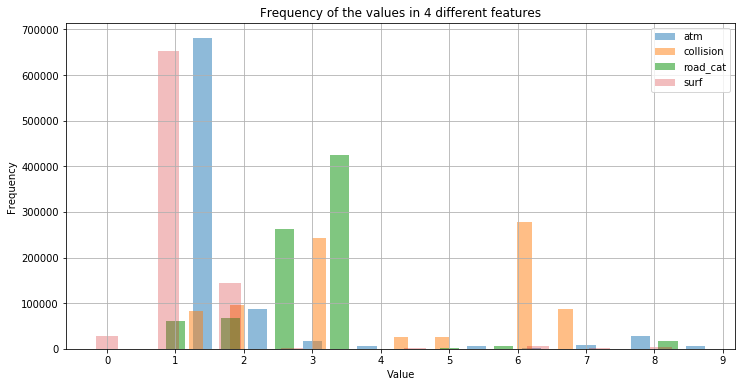

In [8]:
df['atm'].hist(alpha=0.5, rwidth=0.35, align='mid', figsize=(12,6), label='atm')
df['col'].hist(alpha=0.5, rwidth=0.35, align='mid', label='collision')
df['road_cat'].hist(alpha=0.6, rwidth=0.35, align='left', label='road_cat')
df['surf'].hist(alpha=0.3,rwidth=0.35, align='left', label='surf')
plt.title('Frequency of the values in 4 different features', size=12)
plt.xticks(range(10))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

In [9]:
#filling the missin values
df['atm'].fillna(9, inplace=True)
df['col'].fillna(6, inplace=True)
df['road_cat'].fillna(9, inplace=True)
df['surf'].fillna(9, inplace=True)
df['surf'].replace(0,9, inplace=True)
df.surf.value_counts()

1.0    652322
2.0    143254
9.0     32498
7.0      5474
5.0      2643
8.0      2159
3.0       861
6.0       466
4.0       308
Name: surf, dtype: int64

In [10]:
df.num_lanes.fillna(0, inplace=True)
df['num_lanes'] = df['num_lanes'].apply(lambda x: 2 if x>6 or x==0 else x)
df.num_lanes.value_counts()

2.0    573670
1.0    101345
4.0     76934
3.0     66252
6.0     13945
5.0      7839
Name: num_lanes, dtype: int64

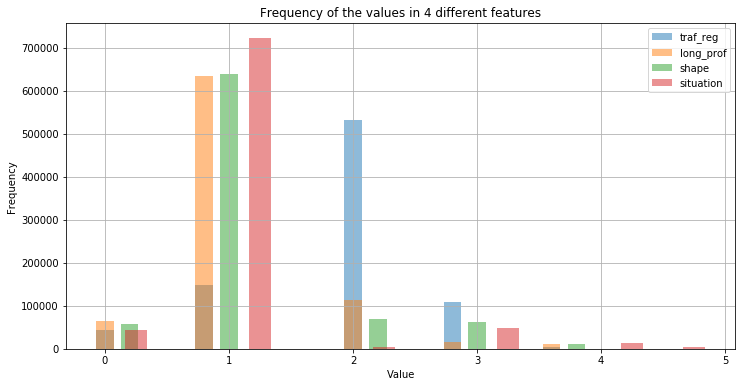

In [11]:
df['traf_reg'].hist(alpha=0.5, rwidth=0.35, align='left', figsize=(12,6), label='traf_reg')
df['long_prof'].hist(alpha=0.5,rwidth=0.35, align='left', label='long_prof')
df['shape'].hist(alpha=0.5,rwidth=0.35, align='mid', label='shape')
df['situation'].hist(alpha=0.5,rwidth=0.35, align='mid', label='situation')
plt.title('Frequency of the values in 4 different features', size=12)
plt.xticks(range(6))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

In [12]:
df.school.fillna(0, inplace=True)
df['school'] = df.school.apply(lambda x:1 if x>0 else 0)

In [13]:
df["dep"] = df["dep"].div(10).apply(np.floor)
df["dep"] = df["dep"].astype(int)

# 3.EDA <a id=#eda>

This section is aiming to gain a better understanding of the data summarizing the main characteristics as well as uncovering importan relationships of the features with the severity of an accident.

### Target: Severity

The data is almost evenly distributed on both high and low severity accidents. 

Accidents classified in each level of severity:
0    471695
1    368290
Name: sev, dtype: int64


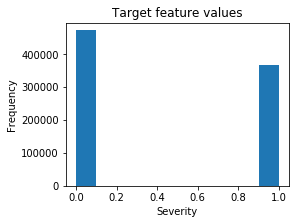

In [14]:
df.sev.plot.hist(figsize=(4,3))
plt.title('Target feature values')
plt.xlabel('Severity')
plt.ylabel('Frequency')
print('Accidents classified in each level of severity:')
print(df.sev.value_counts())

### Seasonality 

The number of traffic accidents decreased over the years from 2005 to 2013, after which the trend became stable.\
Analyszing the yearly trend there is a seasonal pattern where the number of accidents increase around March and then again in September.\
Regarding the day of the week there is not a significant difference between them. There is a steady trend during the week with more accidents on friday, and sunday is the day with less accident of all.\
Lastly analyzing the accidents per hour, there are clearly two spikes, one at 8am, the time people go to work and another one between 5 and 6pm, time when people return home. The number of accidents decreases between these two spikes, nothing unusual but it proves there is a pattern here.

In [15]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
date = df[['ID','sev', 'date']]
date

,ID,sev,date
0,201600000001,1,2016-02-01
1,201600000002,1,2016-03-16
2,201600000003,1,2016-07-13
3,201600000004,1,2016-08-15
4,201600000005,1,2016-12-23
5,201600000006,1,2016-12-23
6,201600000007,0,2016-05-01
7,201600000008,1,2016-05-14
8,201600000009,1,2016-09-23
9,201600000010,1,2016-12-30


In [16]:
date['year']=df.date.dt.year
date['month']=df.date.dt.month
date['weekday']=df.date.dt.weekday

In [17]:
high_sev = date[date['sev']==1]
high_sev

,ID,sev,date,year,month,weekday
0,201600000001,1,2016-02-01,2016,2,0
1,201600000002,1,2016-03-16,2016,3,2
2,201600000003,1,2016-07-13,2016,7,2
3,201600000004,1,2016-08-15,2016,8,0
4,201600000005,1,2016-12-23,2016,12,4
5,201600000006,1,2016-12-23,2016,12,4
7,201600000008,1,2016-05-14,2016,5,5
8,201600000009,1,2016-09-23,2016,9,4
9,201600000010,1,2016-12-30,2016,12,4
10,201600000011,1,2016-01-25,2016,1,0


In [18]:
season = date[['date', 'ID']].groupby('date').count()
season['rolling'] = season.ID.rolling(window=30).mean()
season

,ID,rolling
date,,
2005-01-01,180,NaN
2005-01-02,137,NaN
2005-01-03,234,NaN
2005-01-04,279,NaN
2005-01-05,270,NaN
2005-01-06,281,NaN
2005-01-07,271,NaN
2005-01-08,199,NaN
2005-01-09,164,NaN


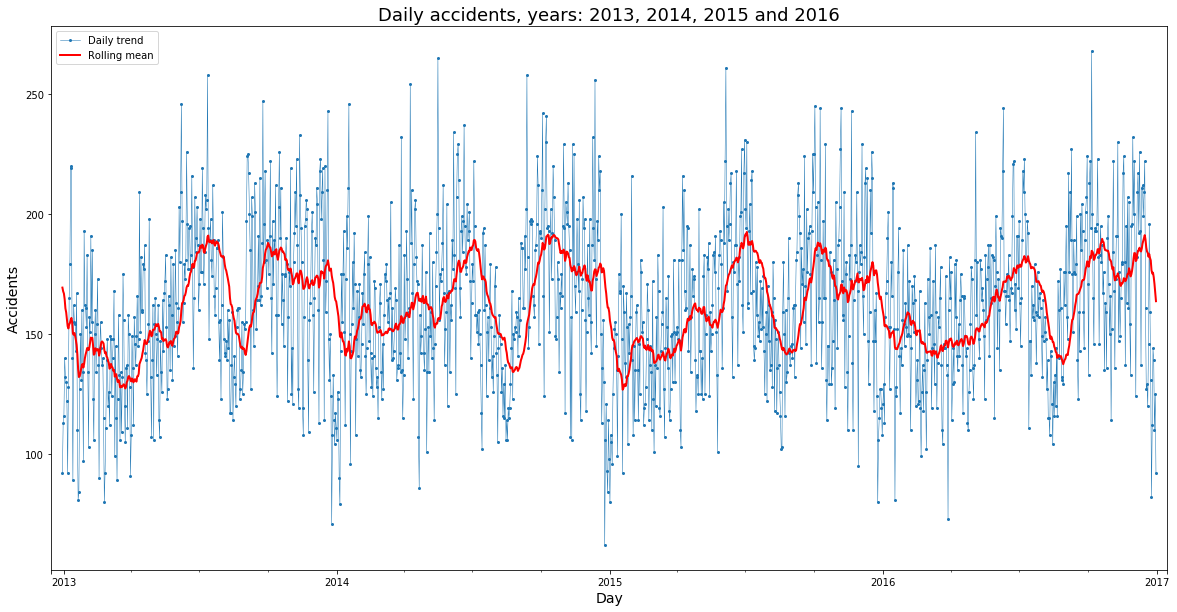

In [20]:
season['ID'][365*8:].plot(figsize=(20,10), marker='o', markersize=2, linewidth=0.5, label='Daily trend')
season['rolling'][365*8:].plot(color='r', linewidth=2, label='Rolling mean')
plt.title('Daily accidents, years: 2013, 2014, 2015 and 2016', size=18)
plt.xlabel('Day', size=14)
plt.ylabel('Accidents', size=14)

t0 = dt.datetime.strptime('2012-12-15', '%Y-%m-%d')
t1 = dt.datetime.strptime('2017-01-15', '%Y-%m-%d')

plt.xlim(t0,t1)
plt.legend()
plt.show()

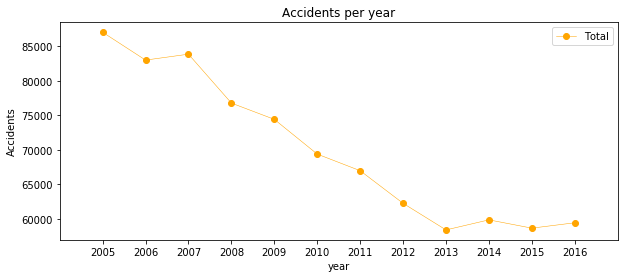

In [21]:

yearly = date[['year', 'ID']].groupby('year').count()
yearly['ID'].plot.line(figsize=(10,4), marker='o', linewidth=0.5, color='orange', label='Total')
plt.title('Accidents per year')
plt.xticks(range(2005,2017))
plt.xlim(2004,2017)
plt.ylabel('Accidents')
plt.legend()

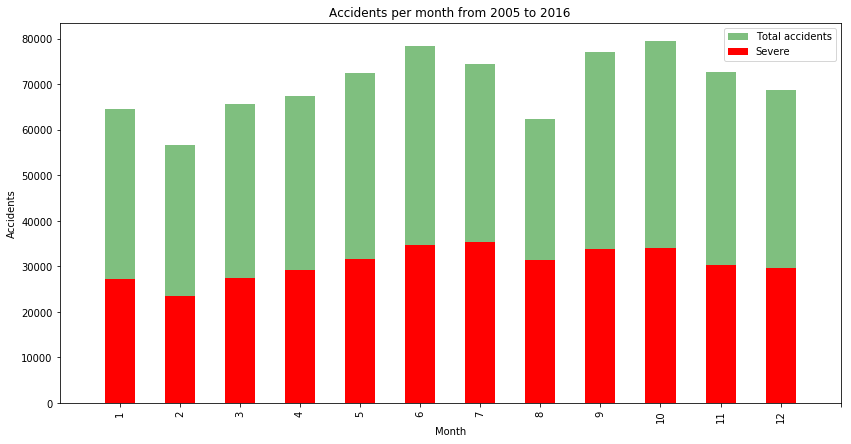

In [22]:
#By month

monthly = date[['month', 'ID']].groupby(['month']).count()
monthly['high_sev'] = high_sev[['month', 'ID']].groupby(['month']).count()


monthly['ID'].plot.bar(figsize=(14,7), alpha=0.5, color='g', label='Total accidents')
monthly['high_sev'].plot.bar(color='r', label='Severe')

plt.title('Accidents per month from 2005 to 2016')
plt.xticks(range(13))
plt.xlim(-1,12)
# plt.ylim(50000,85000)
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.legend()

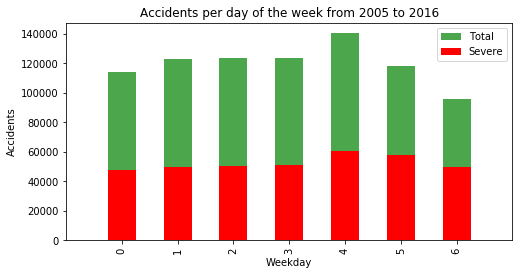

In [23]:
#By day of the week

weekday = date[['weekday', 'ID']].groupby('weekday').count()
weekday['high_sev'] = high_sev[['weekday', 'ID']].groupby(['weekday']).count()
weekday['ID'].plot.bar(figsize=(8,4), alpha=0.7, color='g', label='Total')
weekday['high_sev'].plot.bar(color='r', label='Severe')

plt.title('Accidents per day of the week from 2005 to 2016')
plt.xticks(range(7))
plt.xlim(-1,7)
# plt.ylim(75000,150000)
plt.xlabel('Weekday')
plt.ylabel('Accidents')
plt.legend()

839985

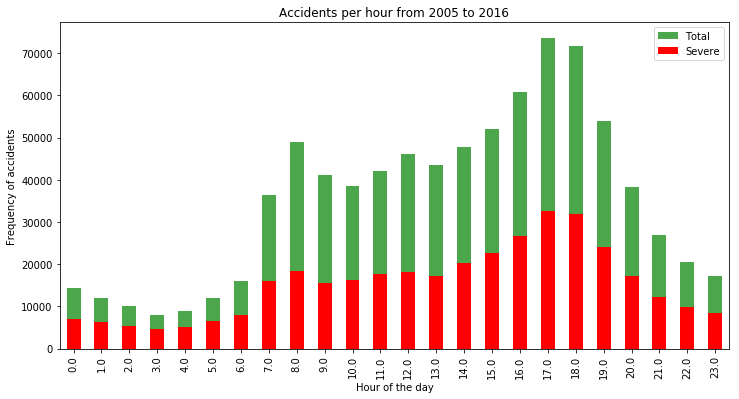

In [24]:
#By hour of the day

hourly = df[['ID', 'time']].groupby('time').count()
hourly['high_sev'] = df[df.sev==1][['ID', 'time']].groupby('time').count()
hourly['ID'].plot.bar(figsize=(12,6), alpha=0.7, color='g', label='Total')
hourly['high_sev'].plot.bar(color='r', label='Severe')
plt.xticks(range(24))
plt.title('Accidents per hour from 2005 to 2016')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()
# df.time.value_counts()
# hourly.ID.value_counts()
hourly['ID'].sum()

In [25]:
noon_morn_severe = hourly.high_sev.loc[0:6].sum()+hourly.high_sev.loc[21:23].sum()
day_severe = hourly.high_sev.loc[7:20].sum()
noon_morn = hourly.ID.loc[0:6].sum()+hourly.ID.loc[21:23].sum()
day = hourly.ID.loc[7:20].sum()
noon_morn_prop = (noon_morn_severe/noon_morn)*100
day_prop = (day_severe/day)*100
print('The percentage of severe accidents from 9pm to 6am is {0:0.2f}% of the total amount of accidents ocurring between this hours,\
     while the percentage of deathly accidents from 7am to 8pm is {1:2.2f}%.'.format(noon_morn_prop.round(2), day_prop))

The percentage of severe accidents from 9pm to 6am is 50.67% of the total amount of accidents ocurring between this hours,     while the percentage of deathly accidents from 7am to 8pm is 42.41%.


In [26]:
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [27]:
df.day.value_counts

<bound method IndexOpsMixin.value_counts of 0          1
1         16
2         13
3         15
4         23
5         23
6          1
7         14
8         23
9         30
10        25
11        28
12         5
13        17
14        17
15         8
16         8
17        28
18         6
19         5
20        14
21         2
22         7
23        12
24         4
25         6
26        15
27         9
28        28
29         6
          ..
839955    14
839956     3
839957     5
839958     9
839959    13
839960    13
839961    15
839962    23
839963     2
839964    16
839965    16
839966    17
839967    22
839968    29
839969     4
839970    11
839971     1
839972     1
839973     3
839974     9
839975    12
839976    15
839977    16
839978    16
839979    20
839980    21
839981    23
839982    26
839983    27
839984    31
Name: day, Length: 839985, dtype: int64>

### Correlation

In [28]:
df[['sev','lum', 'agg', 'int', 'atm',
    'col', 'dep', 'road_cat', 'traf_reg',
    'num_lanes', 'long_prof', 'shape', 'surf', 
    'situation', 'school', 'crit_age','dead_age', 'ped',
    'num_us', 'weekend', 'holiday', 'month', 'day']].corr()['sev'].sort_values(ascending=False)

sev          1.000000
shape        0.139928
situation    0.119172
weekend      0.077594
traf_reg     0.061466
dead_age     0.048087
atm          0.048012
num_us       0.027533
col          0.026740
long_prof    0.026184
holiday      0.021744
month        0.008851
lum          0.002701
day          0.002161
surf         0.000874
ped         -0.005999
school      -0.025260
crit_age    -0.038168
int         -0.062982
road_cat    -0.100728
num_lanes   -0.101300
dep         -0.105883
agg         -0.277563
Name: sev, dtype: float64

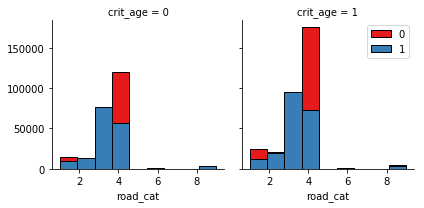

In [29]:
bins = np.linspace(df.atm.min(), df.atm.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist,'road_cat', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

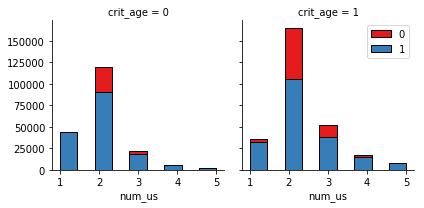

In [30]:
bins = np.linspace(df.lum.min(), df.lum.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'num_us', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

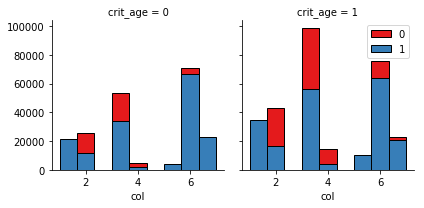

In [31]:
bins = np.linspace(df.col.min(), df.col.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'col', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

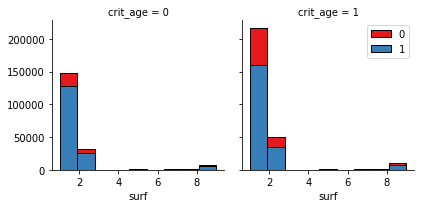

In [32]:
bins = np.linspace(df.surf.min(), df.surf.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'surf', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

Text(0.5, 0, 'Severity')

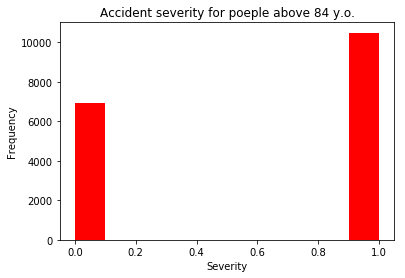

In [33]:
df['sev'][df['dead_age']==1].plot.hist(color='r')
# plt.xlabel('Hour of the day')
plt.title('Accident severity for poeple above 84 y.o.')
plt.xlabel('Severity')

Text(0.5, 0, 'Severity')

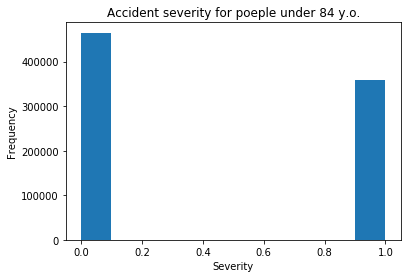

In [34]:
df['sev'][df['dead_age']==0].plot.hist()
plt.title('Accident severity for poeple under 84 y.o.')
plt.xlabel('Severity')

From the correlation of each feature individualy with the severity, there is not a significant correlation in any of the cases. However, from the plots above we can say that gathering together some combinations of the features, these combinations could be classified in the different severity categories.

# 4. Data Preparation <a id=prep>
    
 Step right before the model development. The data preparation consists on the normalization and the train/test/validation split.
 Also the models I will use to predict the severity of an accident do not handel categorical variables so date some features will be dropped for now.

In [35]:
df.drop(['ID', 'date'], axis=1, inplace=True)
df.fillna(0, inplace=True)

In [36]:
#Some feature's values range from 1 to 9 while others just go either for 1 or 2, 
#Normalizing the data makes that any feature has more influence in the result than others.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# X = df.drop('sev', axis=1)
# X = StandardScaler().fit(X).transform(X)

xtrain, xtest, ytrain, ytest = train_test_split(df.drop('sev', axis=1), df['sev'], test_size=0.2, random_state=8)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2) 


print('Size of training set:', xtrain.shape[0],'\n'
      'Size of test set:',xtest.shape[0],'\n'
      'Size of evaluation set:', xval.shape[0])


Size of training set: 537590 
Size of test set: 167997 
Size of evaluation set: 134398


# 5. Model Develoment <a id='modeling'>

In [37]:
#importing models 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [38]:
#Evaluation Metrics
import time
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.metrics import accuracy_score, log_loss, jaccard_similarity_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve

### 1. Decision Tree

In [39]:
t0=time.time()
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = tree.predict(xval)
score_tree = accuracy_score(yval,yhat)
print('Accuracy :',score_tree)

Time taken : 12.83699917793274
Accuracy : 0.6530751945713478


### 1.1. Random Forest
To go a bit further I will develop a Random Forest model. A random forest fits a number of **decision tree** classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The number of decision trees is specified with the `n_estimators` parameter.\
An upside of this algorithm is its `feature_importances_` atribut, it returns the impurity based feature importance.

In [40]:
#RF 1

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 141.83564972877502
Accuracy : 0.7327415586541466


In [41]:
importances = pd.DataFrame({'feature':df.drop('sev', axis=1).columns,'importance':np.round(model_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Unnamed: 0,0.147
dep,0.129
day,0.104
time,0.087
month,0.077
road_cat,0.052
col,0.040
num_us,0.035
agg,0.031


In [42]:
xtrain = pd.DataFrame(xtrain)
xtrain.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age', 'surf', 'long_prof','lum','atm'], axis=1, inplace=True)
xval.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age', 'surf', 'long_prof', 'lum', 'atm'], axis=1, inplace=True)
xtest.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age','surf', 'long_prof', 'lum', 'atm'], axis=1, inplace=True)

In [43]:
#RF 2:
#number of features reduced from 23 to 13

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 115.14043736457825
Accuracy : 0.7237607702495573


In [44]:
#RF 3:

#number of decision trees reduced from 100 to 50
#Limiting the number of features to look at when creating the next split to 5
#Limiting the max depth of the tree to 10


t0=time.time()
model_rf = RandomForestClassifier(n_estimators=50, max_features=5, max_depth =10 ,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 35.946566104888916
Accuracy : 0.7145642048244766


In [45]:
#RF 4:

#number of decision trees reduced from 50 to 10
#Limiting the number of features to look at when creating the next split to 8
#Limiting the max depth of the tree to 12


t0=time.time()
model_rf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 12.488476991653442
Accuracy : 0.7230092709712942


In [46]:
#Evaluation

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
t_rf = time.time()-t0
print('Time taken :' , t_rf)
yhat_rf = model_rf.predict(xtest)
jaccard_rf = jaccard_similarity_score(ytest,yhat_rf)
c_rf = classification_report(ytest,yhat_rf)
prec_rf = precision_score(ytest, yhat_rf)
rec_rf = recall_score(ytest, yhat_rf)
print('Jaccard :',jaccard_rf,'\n',
     c_rf)

Time taken : 12.0499107837677
Jaccard : 0.7240545962130276 
               precision    recall  f1-score   support

           0       0.72      0.83      0.77     94297
           1       0.73      0.59      0.65     73700

   micro avg       0.72      0.72      0.72    167997
   macro avg       0.73      0.71      0.71    167997
weighted avg       0.72      0.72      0.72    167997



The last model has equaled the computational time of the Decision Tree model improving the accuracy from 0.63 to 0.72.

### 2. LogisticRegression

First I'll look for the best regularization coeficient then I creat the model.

In [47]:
acc=np.zeros(6)
i=0
for c in [0.5, 0.1, 0.01, 0.001, 10, 100]:
    lr = LogisticRegression(C=c, solver='liblinear').fit(xtrain, ytrain)
    yhat = lr.predict(xval)
    acc[i] = accuracy_score(yval,yhat)
    i+=1
acc

array([0.56053662, 0.56053662, 0.56053662, 0.56053662, 0.56053662,
       0.56053662])

In [48]:
#Evaluation

t0=time.time()
lr = LogisticRegression(C=0.001, solver='liblinear').fit(xtrain, ytrain)
t_lr = time.time()-t0
print('Time taken :' , t_lr)
yhat = lr.predict(xtest)
jaccard_lr = jaccard_similarity_score(ytest,yhat)
c_lr = classification_report(ytest,yhat)
prec_lr = precision_score(ytest, yhat)
rec_lr = recall_score(ytest, yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Time taken : 5.064460039138794
Jaccard : 0.5589206950124109 
               precision    recall  f1-score   support

           0       0.57      0.93      0.70     94297
           1       0.48      0.08      0.14     73700

   micro avg       0.56      0.56      0.56    167997
   macro avg       0.52      0.51      0.42    167997
weighted avg       0.53      0.56      0.46    167997



### 3. KNN

Firstly I will search for the best performing K and then I will fit the model with the training set and evaluat it with the test set.  
Due to the size of the dataset, I will reduce the training and evaluation sets to the half of them in the process of searching for the optim K.

In [49]:
tt = xtrain.shape[0]
tv = xval.shape[0]
xtrain[int(tt*0.5):].shape[0], xval[int(tv*0.5):].shape[0]

(268795, 67199)

In [50]:
ks = 17
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xtrain[int(tt*0.5):],ytrain[int(tt*0.5):])
    yhat = neigh.predict(xval[int(tv*0.5):])
    mean_acc[n-1] = accuracy_score(yval[int(tv*0.5):],yhat)
    std_acc[n-1] = np.std(yhat==yval[int(tv*0.5):])/np.sqrt(yhat.shape[0])
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))

Best performing K is 13 with an accuracy of 0.7472730248962038


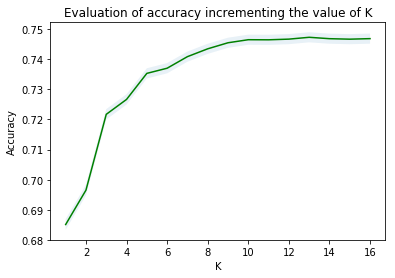

In [51]:
plt.plot(range(1,ks),mean_acc,'g')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)

In [52]:
#Evaluation

t0=time.time()
model_knn = KNeighborsClassifier(n_neighbors = 16, n_jobs=-1)
model_knn.fit(xtrain,ytrain)
t_knn = time.time()-t0
print('Time taken :' , t_knn)
yhat = model_knn.predict(xtest)
jaccard_knn = jaccard_similarity_score(ytest,yhat)
c_knn = classification_report(ytest,yhat)
prec_knn = precision_score(ytest, yhat)
rec_knn = recall_score(ytest, yhat)
print('Jaccard :',jaccard_knn,'\n',
     c_knn)

Time taken : 14.116739749908447
Jaccard : 0.7559896902920885 
               precision    recall  f1-score   support

           0       0.75      0.85      0.80     94297
           1       0.77      0.63      0.70     73700

   micro avg       0.76      0.76      0.76    167997
   macro avg       0.76      0.74      0.75    167997
weighted avg       0.76      0.76      0.75    167997



### 4. SVM

In [53]:
size = [1000,5000,10000,12000,15000,20000,30000,40000,50000,75000,100000]
acc = []
t = []
for s in size:
    t0=time.time()
    sv = SVC().fit(xtrain[:s],ytrain[:s])
    t.append(time.time()-t0)
    yhat = sv.predict(xval[:s])
    acc.append(jaccard_similarity_score(yval[:s],yhat))

In [54]:
performance = pd.DataFrame({'acc':acc, 'time':t}, index=size)
performance

,acc,time
1000,0.546000,0.047980
5000,0.556000,1.151340
10000,0.560000,8.496664
12000,0.561417,14.621914
15000,0.560867,24.790713
20000,0.560150,45.973844
30000,0.558500,108.653856
40000,0.557725,191.008291
50000,0.559120,277.123682
75000,0.559627,668.202438


Text(0.5, 1.0, 'Time(s)')

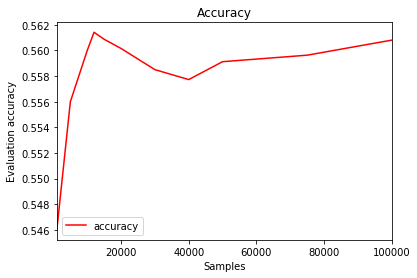

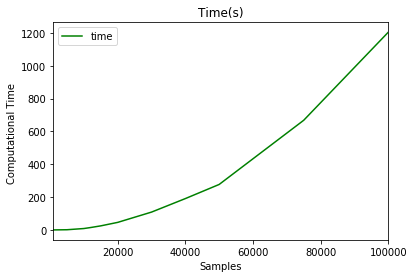

In [55]:
performance.plot(y='acc', color='r', label='accuracy')
plt.xlabel('Samples')
plt.ylabel('Evaluation accuracy')
plt.title('Accuracy')
performance.plot(y='time', color='green', label='time')
plt.xlabel('Samples')
plt.ylabel('Computational Time ')
plt.title('Time(s)')

In [56]:
#Evaluation

s=75000
t0=time.time()
sv = SVC().fit(xtrain[:s],ytrain[:s])
t_svm = time.time()-t0
print('Time taken :' , t_svm)
yhat = sv.predict(xtest[:s])
jaccard_svm = jaccard_similarity_score(ytest[:s],yhat)
c_svm = classification_report(ytest[:s],yhat)
prec_svm = precision_score(ytest[:s], yhat)
rec_svm = recall_score(ytest[:s], yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Time taken : 667.1235308647156
Jaccard : 0.5589206950124109 
               precision    recall  f1-score   support

           0       0.57      0.93      0.70     94297
           1       0.48      0.08      0.14     73700

   micro avg       0.56      0.56      0.56    167997
   macro avg       0.52      0.51      0.42    167997
weighted avg       0.53      0.56      0.46    167997



# 7. Results <a id='results'>
    
    
|**Algorithm**|**Jaccard**|**f1-score**|**Precision**|**Recall**|**Time(s)**|
|---------|-------|----|-------------|------|-------|
|**Random Forest**| 0.722  | 0.72  | 0.724  | 0.591  |  6.588 |
|**Logistic Regression**|  0.661 |  0.65 |  0.667 | 0.456  | 6.530 |
|**KNN**| 0.664  | 0.66  |  0.652 | 0.506  |  200.58 |
|**SVM**| 0.659  | 0.65  |  0.630 |  0.528 |  403.92 |

For this specific problem *precision* means the % of predicted severe accidents that were truly severe. The *recall* instead, is the % of truly severe accidents that were properly predicted. For this specific problem, the recall is more important than the precision as a high recall will favor that all required resources will be equipped up to the severity of the accident.\
In this case, the recall is more important than the precision as a high recall will favor that all required resources will be equipped up to the severity of the accident. The *logistic regression*, *KNN*, and *SVM* models have similar accuracy, however the computational time from the regression is far better than the other two models. With no doubt the *Random Forest* is the best model, in the same time as the *log. res.* it improves the accuracy from 0.66 to 0.72 and the recall from 0.45 to 0.59.


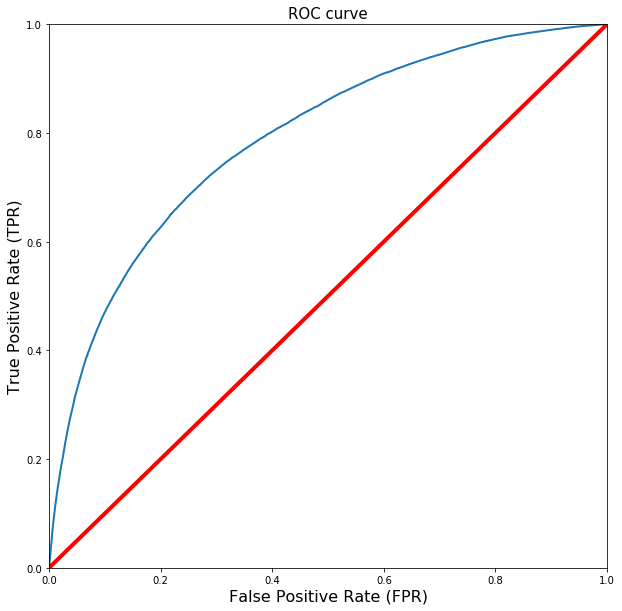

In [59]:
#ROC curve.

yscores = model_rf.predict_proba(xtest)

false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest.values, yscores[:,1])

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='a')
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(10, 10))
plt.title('ROC curve', fontsize=15)
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()